This notebook serves as a platform to check the output of various functions

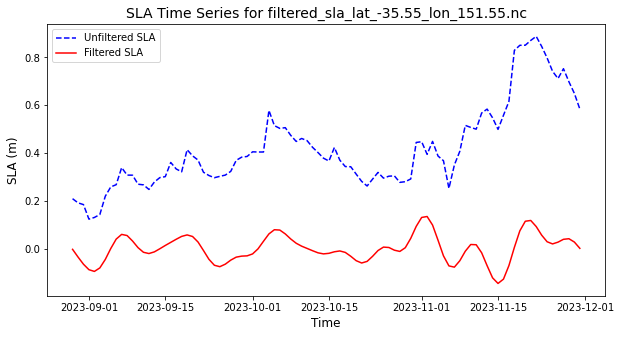

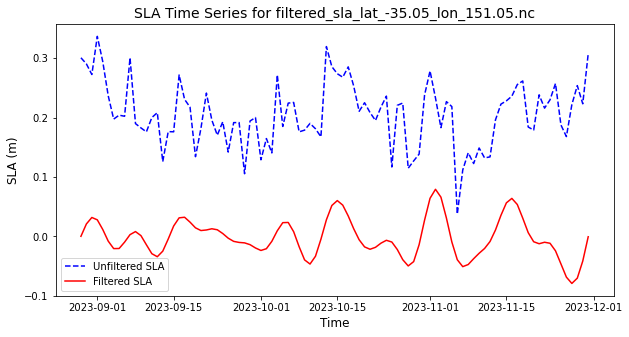

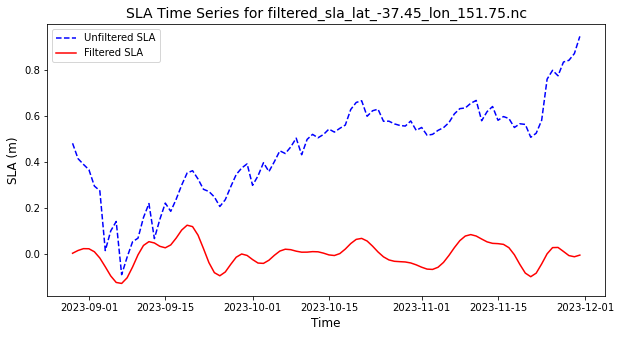

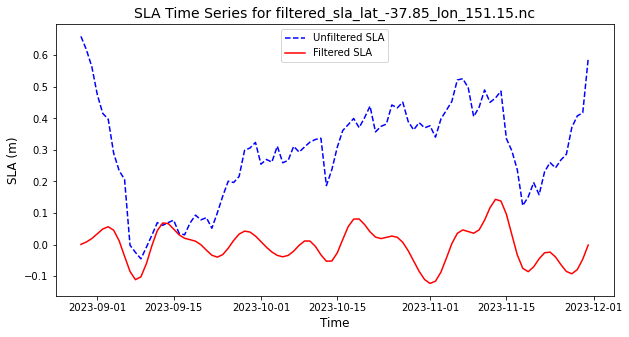

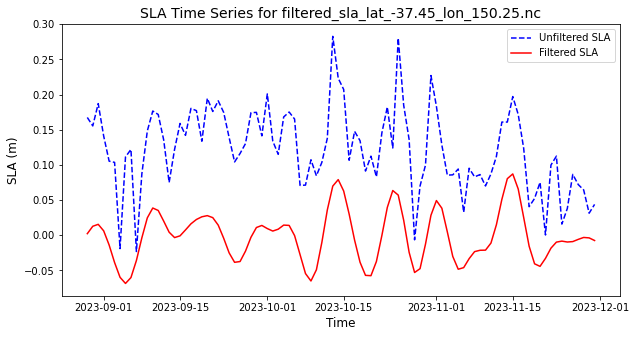

In [1]:
import os
import random
import xarray as xr
import matplotlib.pyplot as plt

# Define the directory where the filtered files for Bluelink are stored
output_dir = '/nfs/DGFI8/H/work_marcello/coastal_trapped_waves_data/filtered_grids_BLUELINK'

# Get a list of all NetCDF files in the directory
file_list = [f for f in os.listdir(output_dir) if f.endswith('.nc')]

# Randomly select 5 files from the list
random_files = random.sample(file_list, 5)

# Plot data from each selected file
for file_name in random_files:
    file_path = os.path.join(output_dir, file_name)
    
    # Open the NetCDF file
    ds = xr.open_dataset(file_path)
    
    # Extract data
    unfiltered_sla = ds['unfiltered_sla'].values
    filtered_sla = ds['filtered_sla'].values
    time = ds['time'].values
    
    # Plot unfiltered and filtered SLA
    plt.figure(figsize=(10, 5))
    plt.plot(time, unfiltered_sla, label='Unfiltered SLA', color='blue', linestyle='--')
    plt.plot(time, filtered_sla, label='Filtered SLA', color='red', linestyle='-')
    
    # Add title and labels
    plt.title(f"SLA Time Series for {file_name}", fontsize=14)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('SLA (m)', fontsize=12)
    plt.legend()
    
    # Show the plot
    plt.show()

    # Close the dataset
    ds.close()
